In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [128]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [129]:
np.random.seed(42)

In [130]:
X.shape

(70000, 784)

In [131]:
X = X.to_numpy()
y = y.to_numpy()

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=False)
y_train[-1]

'6'

In [133]:
y_train[-1]

'6'

In [134]:
y_train_6 = np.ones(len(y_train[y_train=='6']))
y_train_9 = np.zeros(len(y_train[y_train=='9']))
y_train_69 = np.concatenate((y_train_6,y_train_9),axis=0)

In [135]:
idx6 = np.where(y_train=='6')
idx9 = np.where(y_train=='9')

X_train_6 = X_train[idx6]
X_train_9 = X_train[idx9]
X_train_69 = np.concatenate ( (X_train_6, X_train_9),axis=0)

In [136]:
X_train_69.shape,y_train_69.shape

((9746, 784), (9746,))

In [137]:
from sklearn.utils import shuffle
X_train_69,y_train_69=shuffle(X_train_69,y_train_69,random_state=1729)

In [138]:
y_test_6 = np.ones(len(y_test[y_test=='6']))
y_test_9 = np.zeros(len(y_test[y_test=='9']))
y_test_69 = np.concatenate((y_test_6,y_test_9))

idx6 = np.where(y_test=='6')
idx9 = np.where(y_test=='9')

X_test_6 = X_test[idx6]
X_test_9 = X_test[idx9]
X_test_69 = np.concatenate ( (X_test_6, X_test_9),axis=0)

 sum of all the labels in the vector (y_train_69)

In [139]:
y_train_69.sum()

4855.0

In [140]:
y_test_69.sum()

2021.0

Apply StandardScaler to all the training samples in x_train_69

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_69Tf = scaler.fit_transform(X_train_69)

X_train_69Tf[0].mean(),X_train_69Tf[:,0].mean() ,X_train_69Tf[0].std(), X_train_69Tf[:,0].std()

(0.08128379559427823, 0.0, 0.7358823226037738, 0.0)

In [142]:
from warnings import filterwarnings
filterwarnings('ignore')

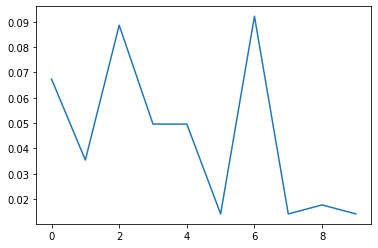

In [143]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
clfA = SGDClassifier(loss='log', random_state=10, max_iter=1, eta0=0.01, warm_start=True, learning_rate='constant')

lossA =[]
iterations = 10
for i in range (iterations):
  clfA.fit(X_train_69,y_train_69)
  y_pred = clfA.predict_proba(X_train_69)
  lossA.append(log_loss(y_train_69,y_pred))

plt.plot(lossA)

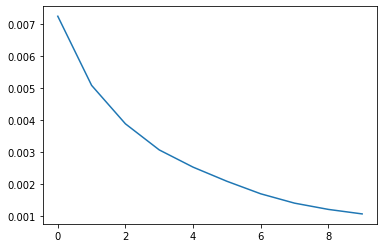

In [144]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
clfB = SGDClassifier(loss='log', random_state=10, max_iter=1, eta0=0.000001, warm_start=True, learning_rate='constant' )

lossB =[]
iterations = 10
for i in range (iterations):
  clfB.fit(X_train_69,y_train_69)
  y_pred = clfB.predict_proba(X_train_69)
  lossB.append(log_loss(y_train_69,y_pred))

plt.plot(lossB)

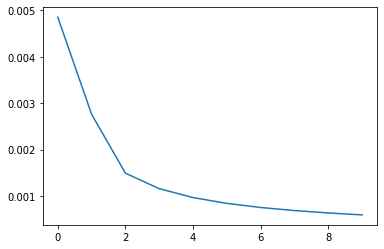

In [145]:
X_train_69_scaled = StandardScaler().fit_transform(X_train_69)
clfC = SGDClassifier(loss='log', random_state=10, max_iter=1, eta0=0.01, warm_start=True, learning_rate='constant')

lossC =[]
iterations = 10
for i in range (iterations):
  clfC.fit(X_train_69_scaled,y_train_69)
  y_pred = clfC.predict_proba(X_train_69_scaled)
  lossC.append(log_loss(y_train_69,y_pred))

plt.plot(lossC)

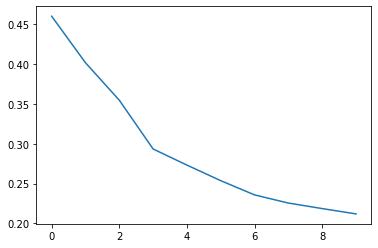

In [146]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
clfD = SGDClassifier(loss='log', random_state=10, max_iter=1, warm_start=True, eta0=0.01,learning_rate='invscaling', power_t=1)

lossD =[]
iterations = 10
for i in range (iterations):
  clfD.fit(X_train_69,y_train_69)
  y_pred = clfD.predict_proba(X_train_69)
  lossD.append(log_loss(y_train_69,y_pred))

plt.plot(lossD)